In [6]:
import pickle 
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd
import seaborn as sns

/scratch/local/8921178/ipykernel_164758/34376726.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [75]:
EXPERIMENT_1 = 'mnist'
EXPERIMENT_2 = 'fashion_mnist'

EXPERIMENT = EXPERIMENT_2

In [76]:
lime_infid_log_file = "result/explainer_evaluation/LIME_infidelity_and_logodds_" + str(EXPERIMENT) + ".pickle"
with open(lime_infid_log_file, 'rb') as f:
    lime_infid_log = pickle.load(f)
    
lime_fid_file = "result/explainer_evaluation/LIME_fidelity_" + str(EXPERIMENT) + ".pickle"
with open(lime_fid_file, 'rb') as f:
    lime_fid = pickle.load(f)
    
other_infid_log_file = "result/explainer_evaluation/others_infidelity_and_logodds_" + str(EXPERIMENT) + ".pickle"
with open(other_infid_log_file, 'rb') as f:
    other_infid_log = pickle.load(f)
    
other_fid_file = "result/explainer_evaluation/others_fidelity_" + str(EXPERIMENT) + ".pickle"
with open(other_fid_file, 'rb') as f:
    other_fid = pickle.load(f)
    
emap_infid_log_dim3_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_0.0001_dim3_" + str(EXPERIMENT) + ".pickle"
with open(emap_infid_log_dim3_file, 'rb') as f:
    emap_infid_log_d3 = pickle.load(f)
    
emap_fid_file_dim3 = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim3_" + str(EXPERIMENT) + ".pickle"
with open(emap_fid_file_dim3, 'rb') as f:
    emap_fid_d3 = pickle.load(f)
    
emap_infid_log_dim2_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_0.0001_dim2_" + str(EXPERIMENT) + ".pickle"
with open(emap_infid_log_dim2_file, 'rb') as f:
    emap_infid_log_d2 = pickle.load(f)
    
emap_fid_file_dim2 = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim2_" + str(EXPERIMENT) + ".pickle"
with open(emap_fid_file_dim2, 'rb') as f:
    emap_fid_d2 = pickle.load(f)
    


In [55]:
def get_attr_cols(cols, attr):
    return [e for e in cols if attr in e]

logodd_cols = get_attr_cols(lime_infid_log.columns, "logodds")

In [5]:
# Get logodds score
list_plot_cols = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'DeepLIFT', 'Gradient-SHAP', 'EMaP (d=2)', 'EMaP (d=3)']

list_of_dfs = []
for frame in [lime_infid_log, other_infid_log, emap_infid_log_d2, emap_infid_log_d3]:
    df = frame[get_attr_cols(frame.columns, "logodds")]
    list_of_dfs.append(df)
    
big_df = pd.concat(list_of_dfs,axis=1)
big_df.columns.values[-1] = 'dummy'
big_df = big_df.rename(columns = dict(zip(big_df.columns,list_plot_cols)))

In [7]:
# big_df

Text(0.5, 1.0, 'Log-odds score on Fashion-MNIST')

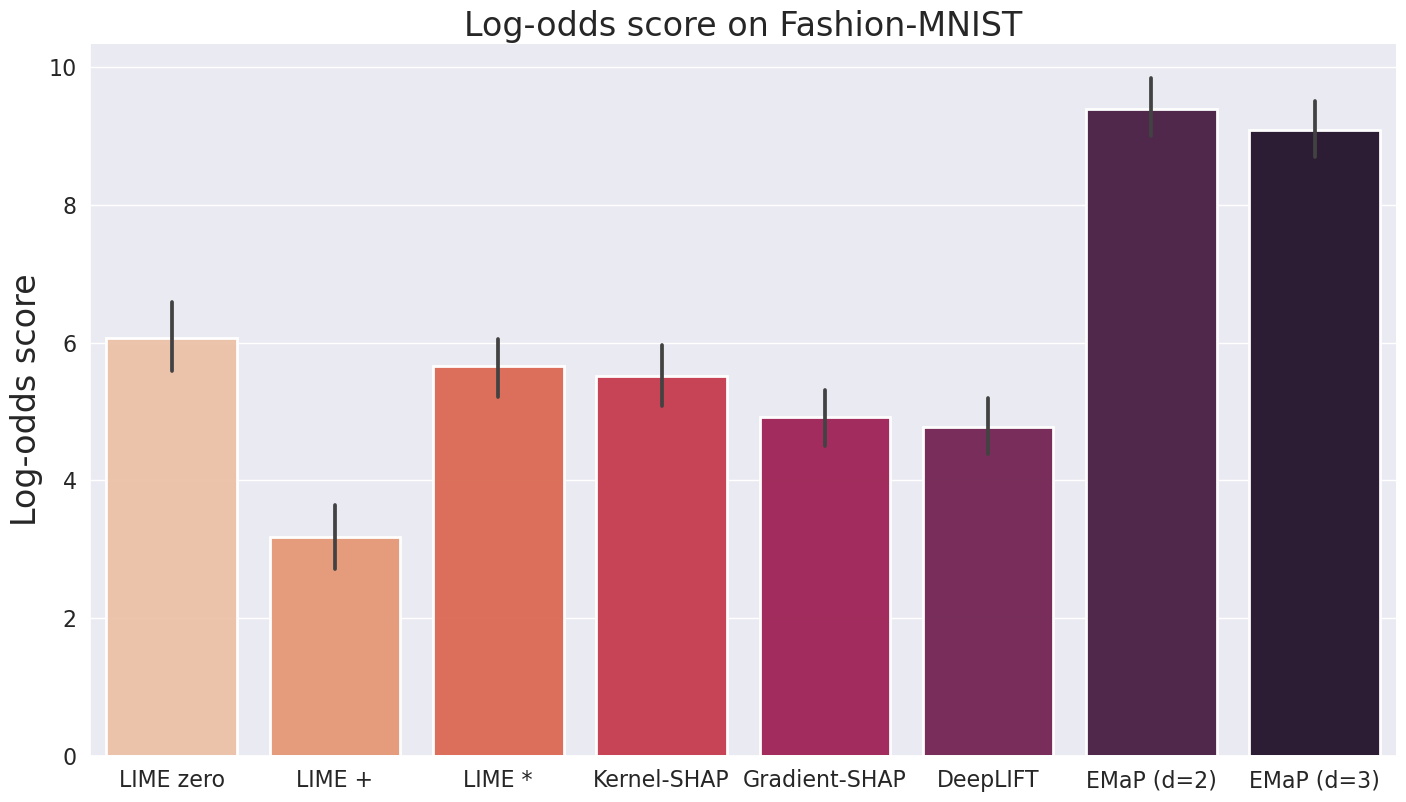

In [8]:
sns.set_style("white")
# sns.set_context(rc = {'patch.linewidth': 10.0})
sns.set(font_scale=1.45)
height = 8
width = 14

plot_order = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'Gradient-SHAP', 'DeepLIFT', 'EMaP (d=2)', 'EMaP (d=3)']

g = sns.catplot(x="variable", y="value", data=pd.melt(big_df),
                kind="bar",   
#                 palette=sns.color_palette(['coral']),
                palette = 'rocket_r',
                alpha=.99,
                height=height,
                linewidth=2,
                aspect=width/height,
                order= plot_order)
g.set_axis_labels("", "Log-odds score")
g.set_ylabels("Log-odds score", fontsize = 24)
plt.title("Log-odds score on Fashion-MNIST", fontsize = 24)

In [9]:
# Get logodds score
list_plot_cols = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'DeepLIFT', 'Gradient-SHAP', 'EMaP (d=2)', 'EMaP (d=3)']

list_of_dfs = []
for frame in [lime_infid_log, other_infid_log, emap_infid_log_d2, emap_infid_log_d3]:
    df = frame[get_attr_cols(frame.columns, "Time")]
    list_of_dfs.append(df)
    
big_df = pd.concat(list_of_dfs,axis=1)
# big_df.columns.values[-1] = 'dummy'
# big_df = big_df.rename(columns = dict(zip(big_df.columns,list_plot_cols)))

In [12]:
# Get infidelity score
list_plot_cols = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'DeepLIFT', 'Gradient-SHAP', 'EMaP (d=2)', 'EMaP (d=3)']

list_of_dfs = []
for frame in [lime_infid_log, other_infid_log, emap_infid_log_d2, emap_infid_log_d3]:
    df = frame[get_attr_cols(frame.columns, "infidelity")]
    list_of_dfs.append(df)
    
big_df = pd.concat(list_of_dfs,axis=1)
big_df.columns.values[-1] = 'dummy'
big_df = big_df.rename(columns = dict(zip(big_df.columns,list_plot_cols)))

In [13]:
big_df["Kernel-SHAP"][big_df[big_df["Kernel-SHAP"].gt(1)].index] = None

/scratch/local/6717320/ipykernel_72504/929683018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df["Kernel-SHAP"][big_df[big_df["Kernel-SHAP"].gt(1)].index] = None


Text(0.5, 1.0, 'Infidelity score on Fashion-MNIST')

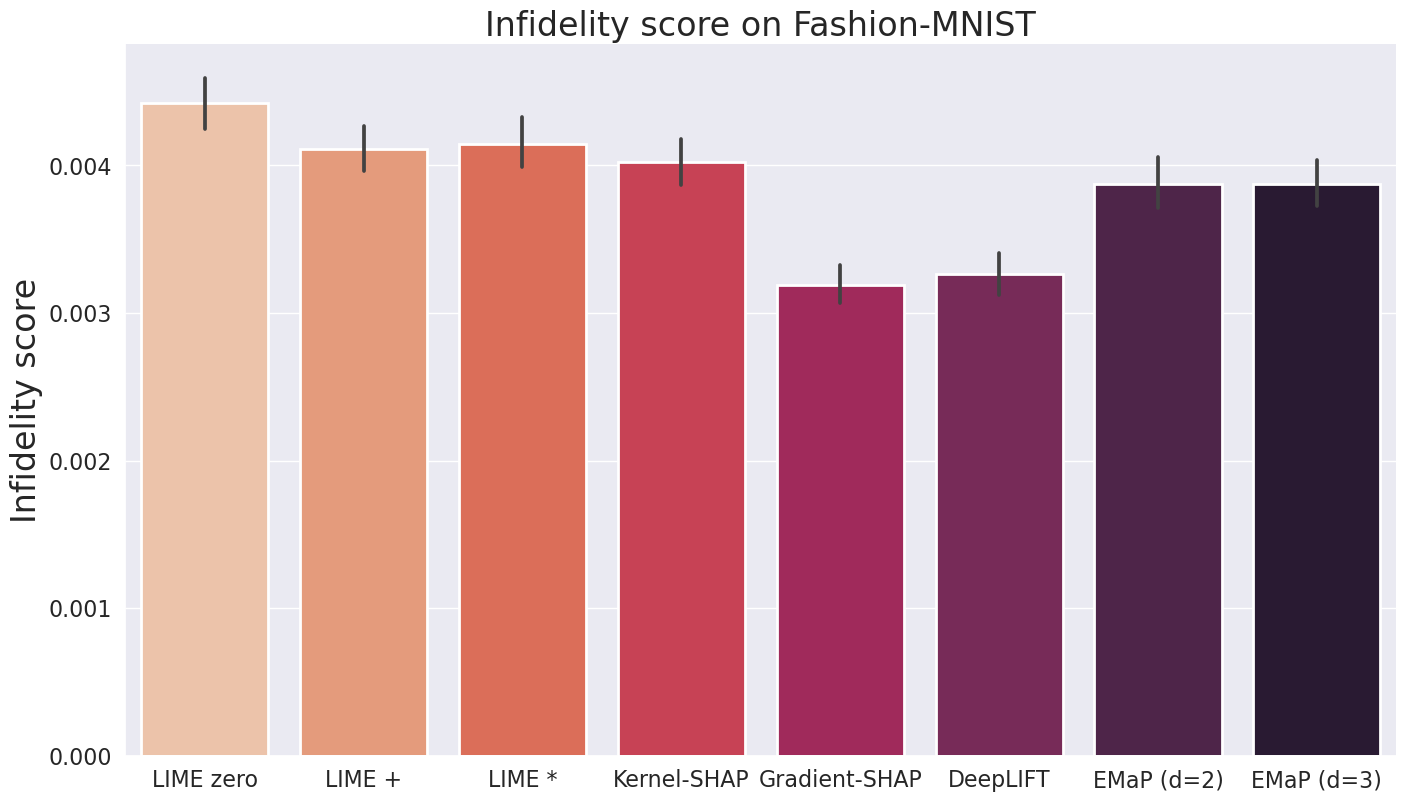

In [14]:
sns.set_style("white")
sns.set(font_scale=1.45)
height = 8
width = 14

g = sns.catplot(x="variable", y="value", data=pd.melt(big_df),
                kind="bar",   
                palette="rocket_r",
#                 alpha=.99,
                height=height,
                aspect=width/height,
                linewidth=2,
                order= plot_order)
g.set_axis_labels("", "Infidelity score")
g.set_ylabels("Infidelity score", fontsize = 24)
# g.set(ylim=(0.00, 0.005))
plt.title("Infidelity score on Fashion-MNIST", fontsize = 24)

In [15]:
# Get logodds score
list_plot_cols =  ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'DeepLIFT', 'Gradient-SHAP', 'EMaP (d=2)', 'EMaP (d=3)']

list_of_dfs = []
for frame in [lime_fid, other_fid, emap_fid_d2, emap_fid_d3]:
    df = frame
    list_of_dfs.append(df)
    
big_df = pd.concat(list_of_dfs,axis=1)
big_df.columns.values[0] = list_plot_cols[0]
big_df.columns.values[1] = list_plot_cols[1]
big_df.columns.values[2] = list_plot_cols[2]
big_df.columns.values[4] = list_plot_cols[3]
big_df.columns.values[5] = list_plot_cols[4]
big_df.columns.values[6] = list_plot_cols[5]
big_df.columns.values[8] = list_plot_cols[6]
big_df.columns.values[10] = list_plot_cols[7]
big_df.columns.values[3] = 'dummy'
big_df.columns.values[7] = 'dummy'
big_df.columns.values[9] = 'dummy'
# big_df = big_df.rename(columns = dict(zip(big_df.columns,list_plot_cols)))

In [16]:
big_df

,LIME zero,LIME +,LIME *,dummy,Kernel-SHAP,DeepLIFT,Gradient-SHAP,dummy,EMaP (d=2),dummy,EMaP (d=3),Num features
0,0.00,0.0,0.05,10,0.00,0.01,0.34,10,0.06,10,0.00,10
1,0.00,0.0,0.10,11,0.00,0.00,0.07,11,0.10,11,0.01,11
2,0.00,0.0,0.14,12,0.00,0.00,0.01,12,0.22,12,0.01,12
3,0.00,0.0,0.23,13,0.00,0.01,0.00,13,0.26,13,0.00,13
4,0.00,0.0,0.03,14,0.00,0.09,0.00,14,0.25,14,0.00,14
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.99,1.0,1.00,95,0.60,1.00,1.00,95,0.00,95,0.00,95
89996,1.00,1.0,1.00,96,0.49,1.00,1.00,96,0.00,96,0.01,96
89997,1.00,1.0,1.00,97,0.47,1.00,1.00,97,0.00,97,0.03,97
89998,0.99,1.0,1.00,98,0.43,1.00,1.00,98,0.00,98,0.01,98


In [17]:
pd.melt(big_df, id_vars=['Num features'])

,Num features,variable,value
0,10,LIME zero,0.00
1,11,LIME zero,0.00
2,12,LIME zero,0.00
3,13,LIME zero,0.00
4,14,LIME zero,0.00
...,...,...,...
989995,95,EMaP (d=3),0.00
989996,96,EMaP (d=3),0.01
989997,97,EMaP (d=3),0.03
989998,98,EMaP (d=3),0.01


<AxesSubplot: xlabel='Num features', ylabel='value'>

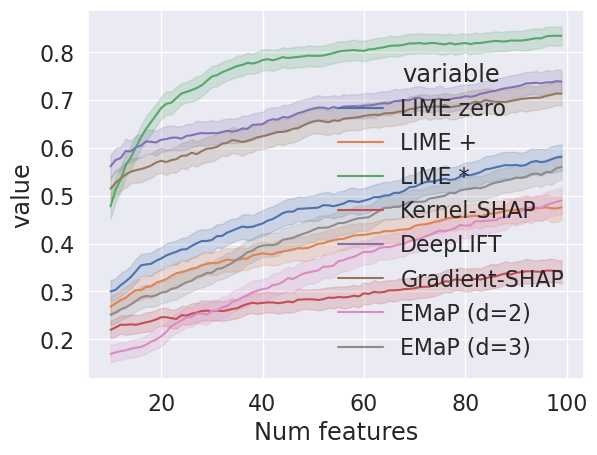

In [18]:
sns.lineplot(x = 'Num features', y = 'value', 
             data=pd.melt(big_df, id_vars=['Num features']), 
#              err_style=err_style, 
#               palette="bright",
#               marker = marker, 
              hue="variable",
              hue_order = list_plot_cols,
#               ax = ax
            )

In [142]:
EXPERIMENT_1 = 'mnist'
EXPERIMENT_2 = 'fashion_mnist'

EXPERIMENT = EXPERIMENT_2

In [143]:
lime_infid_log_file = "result/explainer_evaluation/LIME_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(lime_infid_log_file, 'rb') as f:
    lime_infid_log = pickle.load(f)
    
lime_fid_file = "result/explainer_evaluation/LIME_fidelity_" + str(EXPERIMENT) + "_update2023.pickle"
with open(lime_fid_file, 'rb') as f:
    lime_fid = pickle.load(f)
    
other_infid_log_file = "result/explainer_evaluation/others_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(other_infid_log_file, 'rb') as f:
    other_infid_log = pickle.load(f)
    
other_fid_file = "result/explainer_evaluation/others_fidelity_" + str(EXPERIMENT) + "_update2023.pickle"
with open(other_fid_file, 'rb') as f:
    other_fid = pickle.load(f)
    
emap_infid_log_dim3_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_0.0001_dim3_" + str(EXPERIMENT) + "_update2023rawneg.pickle"
with open(emap_infid_log_dim3_file, 'rb') as f:
    emap_infid_log_d3 = pickle.load(f)
    
emap_fid_file_dim3 = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim3_" + str(EXPERIMENT) + "_update2023rawneg.pickle"
with open(emap_fid_file_dim3, 'rb') as f:
    emap_fid_d3 = pickle.load(f)
    
emap_infid_log_dim2_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_0.0001_dim2_" + str(EXPERIMENT) + "_update2023rawneg.pickle"
with open(emap_infid_log_dim2_file, 'rb') as f:
    emap_infid_log_d2 = pickle.load(f)
    
emap_fid_file_dim2 = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim2_" + str(EXPERIMENT) + "_update2023rawneg.pickle"
with open(emap_fid_file_dim2, 'rb') as f:
    emap_fid_d2 = pickle.load(f)
    


In [148]:
# Get fidelity score
list_plot_cols = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'DeepLIFT', 'Gradient-SHAP', 'EMaP (d=2)', 'EMaP (d=3)']
no_f = 80
list_of_dfs = []
for frame in [lime_fid[lime_fid["Num features"] == no_f], other_fid[other_fid["Num features"] == no_f], emap_fid_d2[emap_fid_d2["Num features"] == no_f], emap_fid_d3[emap_fid_d3["Num features"] == no_f]]:
    df = frame[get_attr_cols(frame.columns, "fidelity")]
    list_of_dfs.append(df)
    
big_df = pd.concat(list_of_dfs,axis=1)

In [149]:
big_df.columns.values[0] = list_plot_cols[0]
big_df.columns.values[1] = list_plot_cols[1]
big_df.columns.values[2] = list_plot_cols[2]
big_df.columns.values[3] = list_plot_cols[3]
big_df.columns.values[4] = list_plot_cols[4]
big_df.columns.values[5] = list_plot_cols[5]
big_df.columns.values[6] = list_plot_cols[6]
big_df.columns.values[7] = list_plot_cols[7]

Text(0.5, 1.0, 'RDT fidelity score on Fashion-MNIST (K=80)')

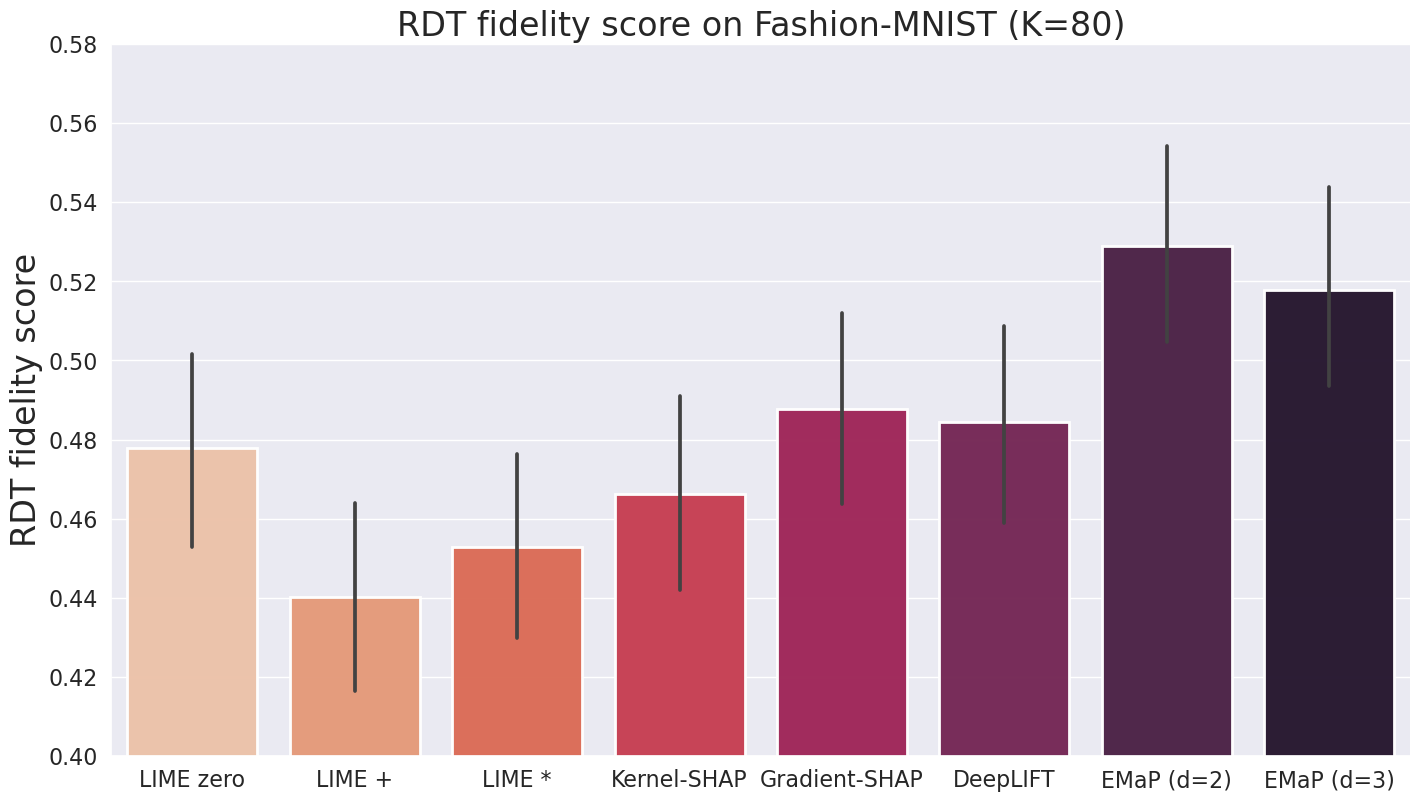

In [151]:
sns.set_style("white")
# sns.set_context(rc = {'patch.linewidth': 10.0})
sns.set(font_scale=1.45)
height = 8
width = 14

plot_order = ['LIME zero', 'LIME +', 'LIME *', 'Kernel-SHAP', 'Gradient-SHAP', 'DeepLIFT', 'EMaP (d=2)', 'EMaP (d=3)']

g = sns.catplot(x="variable", y="value", data=pd.melt(big_df),
                kind="bar",   
#                 palette=sns.color_palette(['coral']),
                palette = 'rocket_r',
                alpha=.99,
                height=height,
                linewidth=2,
                aspect=width/height,
                order= plot_order)
g.set_axis_labels("", "")
g.set_ylabels("RDT fidelity score", fontsize = 24)
g.set(ylim=(0.4, 0.58))
plt.title("RDT fidelity score on Fashion-MNIST (K=80)", fontsize = 24)

In [7]:
EXPERIMENT = 'fashion_mnist'

In [50]:
emap_fid_file = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim2_" + str(EXPERIMENT) + "_update2023rawneg.pickle"
with open(emap_fid_file, 'rb') as f:
    emap_fid_raw = pickle.load(f)
    
emap_fid_file = "result/explainer_evaluation/EMaP_fidelity_0.0001_dim2_" + str(EXPERIMENT) + "_update2023.pickle"
with open(emap_fid_file, 'rb') as f:
    emap_fid = pickle.load(f)

lime_fid_file = "result/explainer_evaluation/LIME_fidelity_" + str(EXPERIMENT) + "_update2023.pickle"
with open(lime_fid_file, 'rb') as f:
    lime_fid = pickle.load(f)
    
others_fid_file = "result/explainer_evaluation/others_fidelity_" + str(EXPERIMENT) + "_update2023.pickle"
with open(others_fid_file, 'rb') as f:
    others_fid = pickle.load(f)

In [41]:
emap_infid_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_1e-05_dim2_" + str(EXPERIMENT) + "_update2023.pickle"
with open(emap_infid_file, 'rb') as f:
    emap_infid = pickle.load(f)

lime_infid_file = "result/explainer_evaluation/LIME_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(lime_infid_file, 'rb') as f:
    lime_infid = pickle.load(f)
    
others_infid_file = "result/explainer_evaluation/others_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(others_infid_file, 'rb') as f:
    others_infid = pickle.load(f)

In [37]:
emap_infid_file = "result/explainer_evaluation/EMaP_infidelity_and_logodds_0.0001_dim2_" + str(EXPERIMENT) + "_update2023raw.pickle"
with open(emap_infid_file, 'rb') as f:
    emap_infid = pickle.load(f)

lime_infid_file = "result/explainer_evaluation/LIME_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(lime_infid_file, 'rb') as f:
    lime_infid = pickle.load(f)
    
others_infid_file = "result/explainer_evaluation/others_infidelity_and_logodds_" + str(EXPERIMENT) + "_update2023.pickle"
with open(others_infid_file, 'rb') as f:
    others_infid = pickle.load(f)